**Task H**

In [16]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import convolve
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [17]:
audio_file = 'single_instrument_one_note.wav'
y, sr = librosa.load(audio_file, sr=None)

print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y)/sr:.3f} seconds")
print(f"Number of samples: {len(y)}")
print(f"Audio shape: {y.shape}")


Sample rate: 48000 Hz
Duration: 4.697 seconds
Number of samples: 225466
Audio shape: (225466,)


In [18]:
def plot_spectrogram(y, sr, win_length_ms, hop_length_ms, title, window='hann'):
    
    win_length = int(win_length_ms * sr / 1000)
    hop_length = int(hop_length_ms * sr / 1000)
    
    D = librosa.stft(y, 
                     n_fft=win_length, 
                     hop_length=hop_length, 
                     window=window,
                     center=True)
    
    magnitude_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    img = librosa.display.specshow(magnitude_db,
                                   y_axis='hz',
                                   x_axis='time',
                                   sr=sr,
                                   hop_length=hop_length,
                                   ax=ax,
                                   vmin=-60,
                                   vmax=0)
    
    cbar = plt.colorbar(img, ax=ax, format='%+2.0f dB')
    cbar.ax.yaxis.set_label_position('right')
    cbar.set_label('Magnitude (dB)', rotation=270, labelpad=15)
    
    ax.set_title(f'{title}\n(Window: {win_length_ms}ms, Hop: {hop_length_ms}ms, {window} window)')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    
    plt.tight_layout()
    plt.show()
    
    return magnitude_db, win_length, hop_length


**Task H** - a)

=== Part (a): 30ms window, 15ms hop length ===


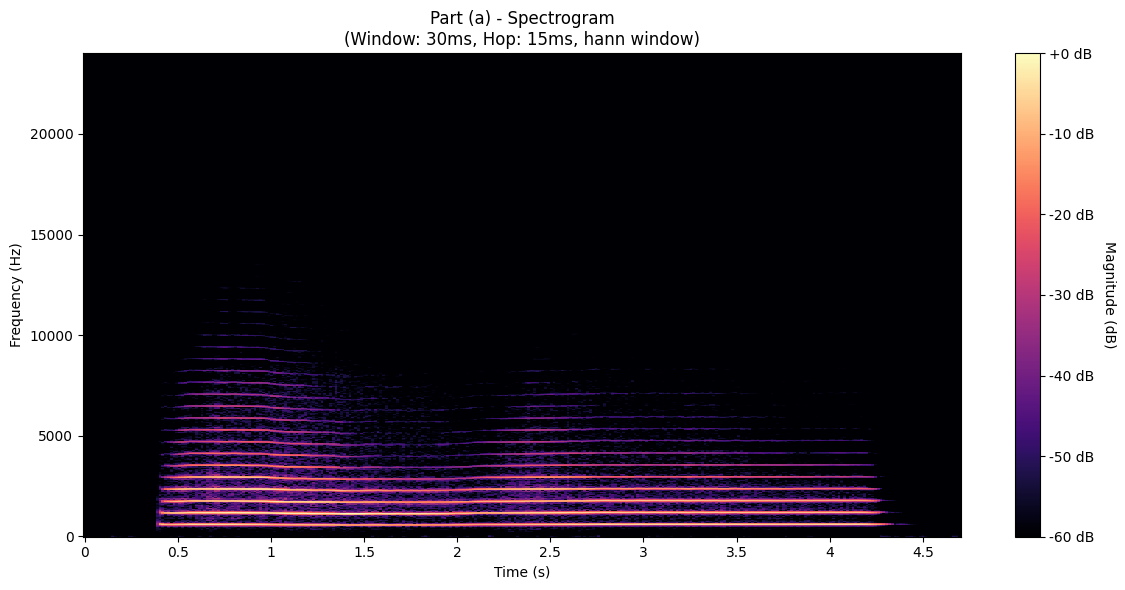

Window length in samples: 1440
Hop length in samples: 720
Frequency resolution: 33.33 Hz
Time resolution: 15.00 ms


In [19]:
# Part (a): 30ms window, 15ms hop, hanning window
print("=== Part (a): 30ms window, 15ms hop length ===")
magnitude_db_a, win_len_a, hop_len_a = plot_spectrogram(y, sr, 
                                                        win_length_ms=30, 
                                                        hop_length_ms=15, 
                                                        title="Part (a) - Spectrogram",
                                                        window='hann')

print(f"Window length in samples: {win_len_a}")
print(f"Hop length in samples: {hop_len_a}")
print(f"Frequency resolution: {sr/win_len_a:.2f} Hz")
print(f"Time resolution: {hop_len_a/sr*1000:.2f} ms")


**Task H** - b)

=== Part (b): 5ms window, 2.5ms hop length ===


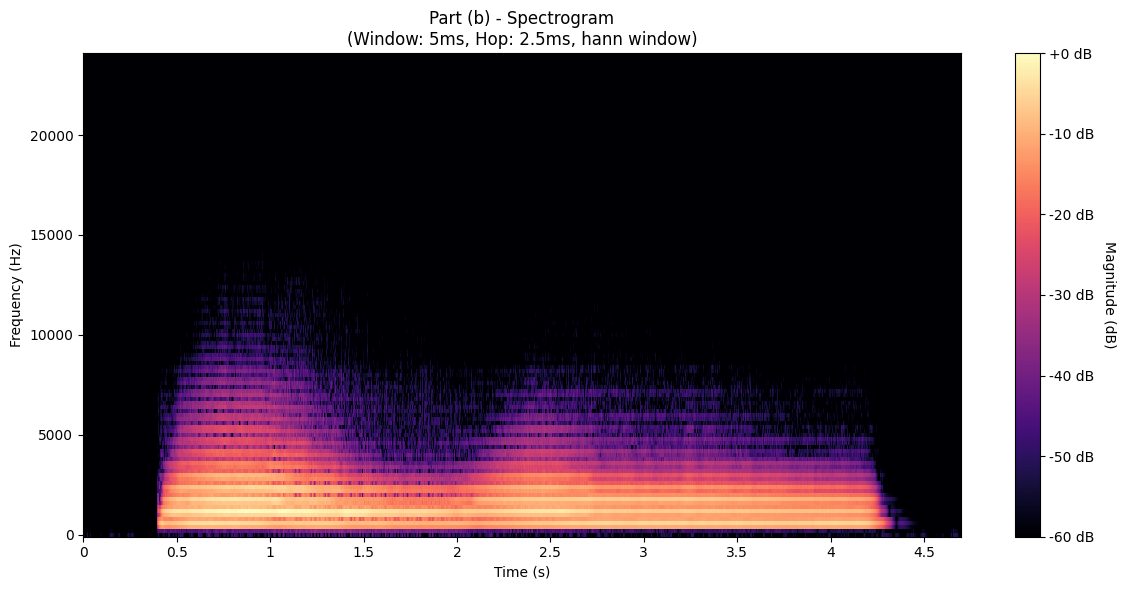

Window length in samples: 240
Hop length in samples: 120
Frequency resolution: 200.00 Hz
Time resolution: 2.50 ms


In [20]:
# Part (b): 5ms window, 2.5ms hop, hanning window
print("=== Part (b): 5ms window, 2.5ms hop length ===")
magnitude_db_b, win_len_b, hop_len_b = plot_spectrogram(y, sr, 
                                                        win_length_ms=5, 
                                                        hop_length_ms=2.5, 
                                                        title="Part (b) - Spectrogram",
                                                        window='hann')

print(f"Window length in samples: {win_len_b}")
print(f"Hop length in samples: {hop_len_b}")
print(f"Frequency resolution: {sr/win_len_b:.2f} Hz")
print(f"Time resolution: {hop_len_b/sr*1000:.2f} ms")


**Task H** - c)

In [21]:
# Part (c): Convolve the signal three times with itself
print("=== Part (c): Convolution and Spectrogram ===")

# First convolution: y * y
y_conv1 = convolve(y, y, mode='same')
print(f"After 1st convolution - Length: {len(y_conv1)}")

# Second convolution: (y * y) * y  
y_conv2 = convolve(y_conv1, y, mode='same')
print(f"After 2nd convolution - Length: {len(y_conv2)}")

# Third convolution: ((y * y) * y) * y
y_conv3 = convolve(y_conv2, y, mode='same')
print(f"After 3rd convolution - Length: {len(y_conv3)}")

y_conv3_normalized = y_conv3 / np.max(np.abs(y_conv3))
print(f"Convolved signal normalized. Max amplitude: {np.max(np.abs(y_conv3_normalized))}")


=== Part (c): Convolution and Spectrogram ===
After 1st convolution - Length: 225466
After 2nd convolution - Length: 225466
After 3rd convolution - Length: 225466
Convolved signal normalized. Max amplitude: 1.0


Plotting spectrogram of 3x convolved signal...


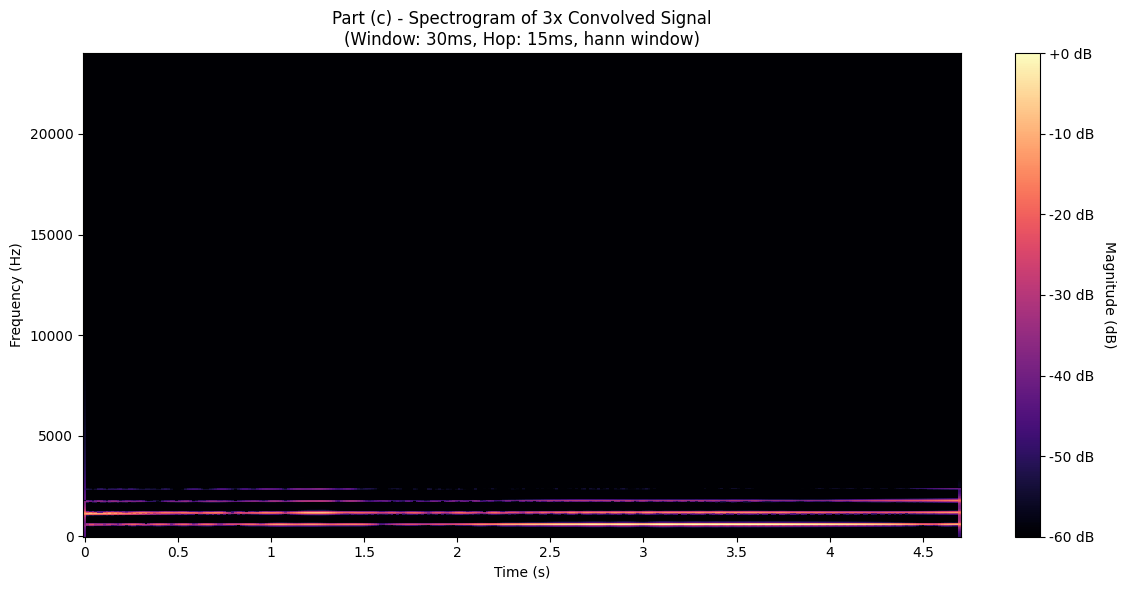

Convolved signal saved as 'convolved_signal.wav' for listening


In [22]:
print("Plotting spectrogram of 3x convolved signal...")
magnitude_db_c, _, _ = plot_spectrogram(y_conv3_normalized, sr, win_length_ms=30, hop_length_ms=15, title="Part (c) - Spectrogram of 3x Convolved Signal",window='hann')

import soundfile as sf
try:
    sf.write('convolved_signal.wav', y_conv3_normalized, sr)
    print("Convolved signal saved as 'convolved_signal.wav' for listening")
except:
    print("Could not save audio file (soundfile library may not be installed)")


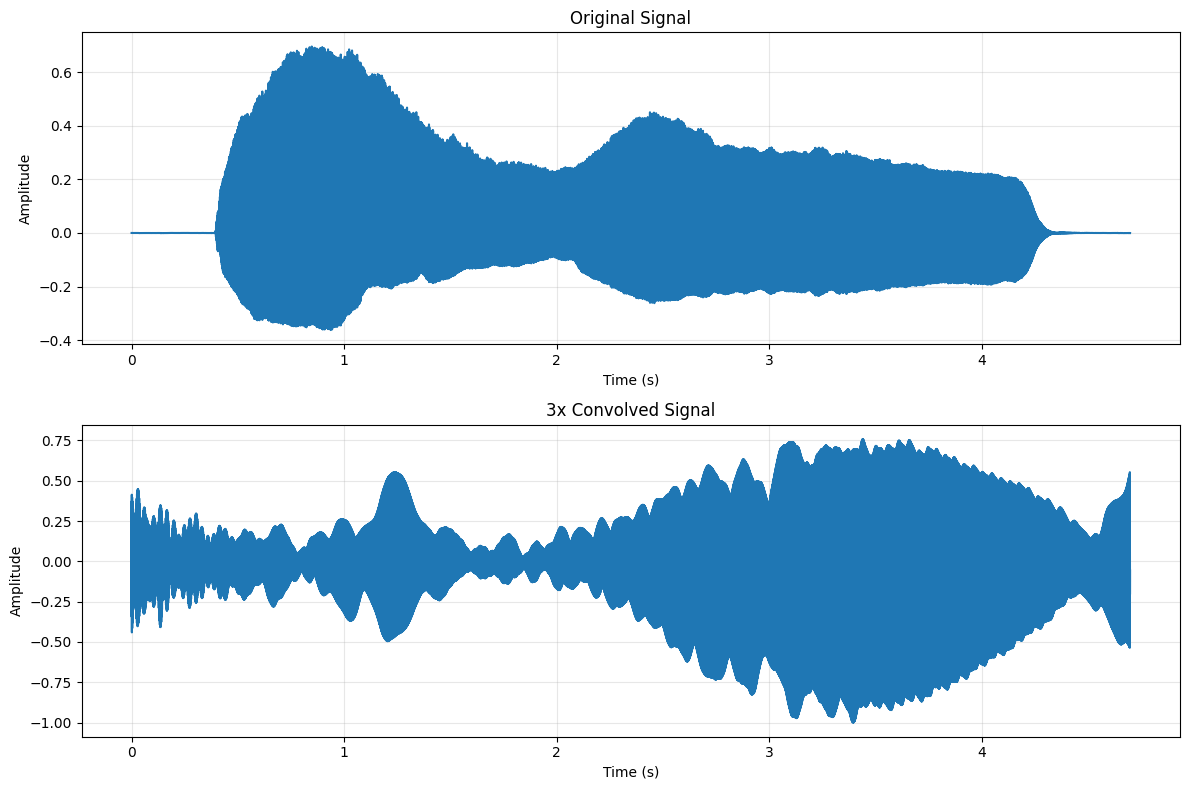

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

time = np.linspace(0, len(y)/sr, len(y))
time_conv = np.linspace(0, len(y_conv3_normalized)/sr, len(y_conv3_normalized))

ax1.plot(time, y)
ax1.set_title('Original Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True, alpha=0.3)

ax2.plot(time_conv, y_conv3_normalized)
ax2.set_title('3x Convolved Signal')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Observations:**

1. **Window Length Effects on Spectrograms:**
   - **Part (a) - 30ms window:** Provides better frequency resolution ($\Delta f = \frac{f_s}{N}$, where N is the window length) but poorer time resolution. The spectrogram shows smoother frequency content with less temporal detail.

   
   - **Part (b) - 5ms window:** Provides better time resolution but poorer frequency resolution. The spectrogram shows more temporal variations but with less precise frequency information due to the shorter analysis window.

2. **Time-Frequency Trade-off:**
   The fundamental trade-off in spectral analysis is governed by the uncertainty principle: $\Delta t \cdot \Delta f \geq \frac{1}{4\pi}$. Shorter windows (5ms) give better time localization but broader frequency bands, while longer windows (30ms) give better frequency resolution but smear events in time.

3. **Convolution Effects (Part c):**
   - **Spectral Changes:** Convolving a signal with itself three times ($y * y * y * y$) results in spectral shaping where the magnitude spectrum becomes $|Y(\omega)|^4$, significantly enhancing dominant frequency components while suppressing weaker ones.
   
   - **Harmonic Enhancement:** The convolution process acts as a non-linear operation that can create or emphasize harmonic content, making the fundamental frequency and its harmonics more prominent in the spectrogram.
   
   - **Temporal Spreading:** Each convolution increases the effective duration of transient events, leading to temporal smearing visible in the spectrogram.
   
   - **Amplitude Distribution:** The repeated convolution changes the amplitude distribution, potentially making the signal sound more sustained or "reverberant" when listened to.

4. **Perceptual Considerations:**
   The convolved signal likely sounds different from the original due to:
   - Enhanced harmonic structure
   - Increased perceived "richness" or "fullness"
   - Possible increase in perceived loudness of dominant frequencies
   - Temporal stretching effects that may make transients appear more sustained
